# **Part 1) Problem Statement**

### Background
Tetouan is a northern city located in Morrocco which has a population size of 539,661 people that is expected to increase at an annual rate of 1.36% (World Population, 2023). 
This becomes an issue as Morroco relies heavily on imported oil products as observed from a steady increase during the period between 2015 to 2019 (+6% annually). This number only declined in 2020 (-12%) due to the COVID-19 pandemic.


### Dataset Collection
The power consumption dataset was collected from Supervisory Control and Data Acquisition System (SCADA) of Amendis which serves the low and medium voltage consumers in Tetouan regions.

The data consist of the power consumption data points for every 10 minutes intervals from the period between 1st Jan 2017 (0:00) to 30th Dec 2017 (23:50). 

The three zone power stations powers three different areas in the city, namely Quads, Smir and Boussafou.

### Brief Explanation of Dataset Features

- DateTime: Time intervals of ten minutes.

- Temperature: Weather Temperature in °C

- Humidity: Weather Humidity in %

- Wind Speed: Wind Speed in km/h

- general diffuse flows: The general mixtures of cold seawater and either magmatically heated fluids, conductively heated seawater, or both.

- diffuse flows: a catchall term to describe low-temperature (< 0.2° to ~ 100°C) fluids that slowly discharge through sulfide mounds, fractured lava flows, and assemblages of bacterial mats and macrofauna. 

- Zone 1 Power Consumption: The energy distributed in KiloWatts (KW) from the power station, Quads.

- Zone 2 Power Consumption: The energy distributed in KiloWatts (KW) from the power station, Smir.

- Zone 3 Power Consumption: The energy distributed in KiloWatts (KW) from the power station, Boussafa.

### **Motivation**
With a heavy reliance on imported oil products and rising population, the study of energy consumption is therefore crucial in finding the balance between energy production and consumption.

Improving the energy consumption forecast can help the following:
- Reduces production costs (excess supply is hard and expensive to store)
- Avoid power shortages
- Ensure energy demands are met

# **Problem Definition**
### 1) Which of these model is better at predicting the energy consumption?
### 2) Are we able to predict the energy consumption based on a given hour?

# **Import Dataset and Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Libaries imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
data = pd.read_csv("/content/gdrive/MyDrive/DSAI Project/Data/Tetuan City power consumption.csv")
data

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [ ]:
null_values = pd.DataFrame(data.isnull().sum()/len(data)*100, columns = ["Percentage of missing values"], index = data.columns)
null_values

,Percentage of missing values
DateTime,0.0
Temperature,0.0
Humidity,0.0
Wind Speed,0.0
general diffuse flows,0.0
diffuse flows,0.0
Zone 1 Power Consumption,0.0
Zone 2 Power Consumption,0.0
Zone 3 Power Consumption,0.0


In [ ]:
data.shape

(52416, 9)

In [ ]:
data.dtypes

DateTime                      object
Temperature                  float64
Humidity                     float64
Wind Speed                   float64
general diffuse flows        float64
diffuse flows                float64
Zone 1 Power Consumption     float64
Zone 2  Power Consumption    float64
Zone 3  Power Consumption    float64
dtype: object

# **Part 2) Exploratory Data Analysis (EDA)**
## **Data Preparation and Cleaning**

In [ ]:
data['DateTime'] = pd.to_datetime(data['DateTime'])
data.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [ ]:
def create_features(df):
    df['Hour'] = df['DateTime'].dt.hour
    df['Minute'] = df['DateTime'].dt.minute
    df['Year'] = df['DateTime'].dt.year
    df['Month'] = df['DateTime'].dt.month
    df['Day'] = df['DateTime'].dt.day
    # df['Day Of Week'] = df['DateTime'].dt.dayofweek
    # df['Quarter'] = df['DateTime'].dt.quarter
    return df
data = create_features(data)
data

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,Hour,Minute,Year,Month,Day
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0,0,2017,1,1
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0,10,2017,1,1
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,0,20,2017,1,1
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,0,30,2017,1,1
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,0,40,2017,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52411,2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,23,10,2017,12,30
52412,2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,23,20,2017,12,30
52413,2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,23,30,2017,12,30
52414,2017-12-30 23:40:00,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504,23,40,2017,12,30


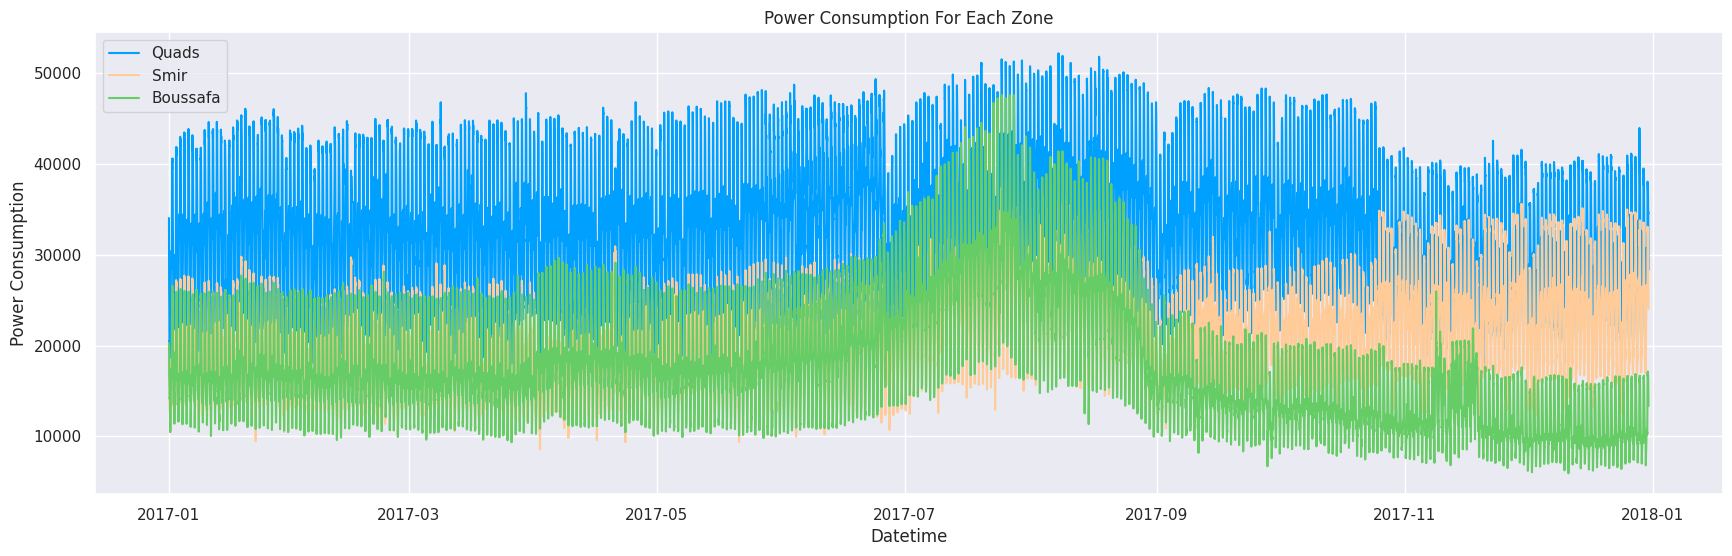

In [ ]:
fig, ax = plt.subplots(figsize=(21, 6))
ax.plot(data['DateTime'], data['Zone 1 Power Consumption'], color ='#00A0FF', label='Quads')
ax.plot(data['DateTime'], data['Zone 2  Power Consumption'], color = '#FFCC99', label='Smir')
ax.plot(data['DateTime'], data['Zone 3  Power Consumption'], color = '#66CC66', label='Boussafa')

plt.title('Power Consumption For Each Zone')
ax.set_ylabel('Power Consumption')
ax.set_xlabel('Datetime')
ax.legend(loc = 'upper left')
plt.show()


In [ ]:
target = []
for x, y, z in zip(data["Zone 1 Power Consumption"], data["Zone 2  Power Consumption"], data["Zone 3  Power Consumption"]):
  target.append(float(x) + float(y) + float(z))
data["Target"] = pd.Series(target)

data = data.drop(["Zone 1 Power Consumption", "Zone 2  Power Consumption", "Zone 3  Power Consumption"], axis = 1)
data = data.drop(["Temperature", "Humidity", "Wind Speed", "general diffuse flows", "diffuse flows"], axis = 1)
data.head()

,DateTime,Hour,Minute,Year,Month,Day,Target
0,2017-01-01 00:00:00,0,0,2017,1,1,70425.53544
1,2017-01-01 00:10:00,0,10,2017,1,1,69320.84387
2,2017-01-01 00:20:00,0,20,2017,1,1,67803.22193
3,2017-01-01 00:30:00,0,30,2017,1,1,65489.23209
4,2017-01-01 00:40:00,0,40,2017,1,1,63650.44627


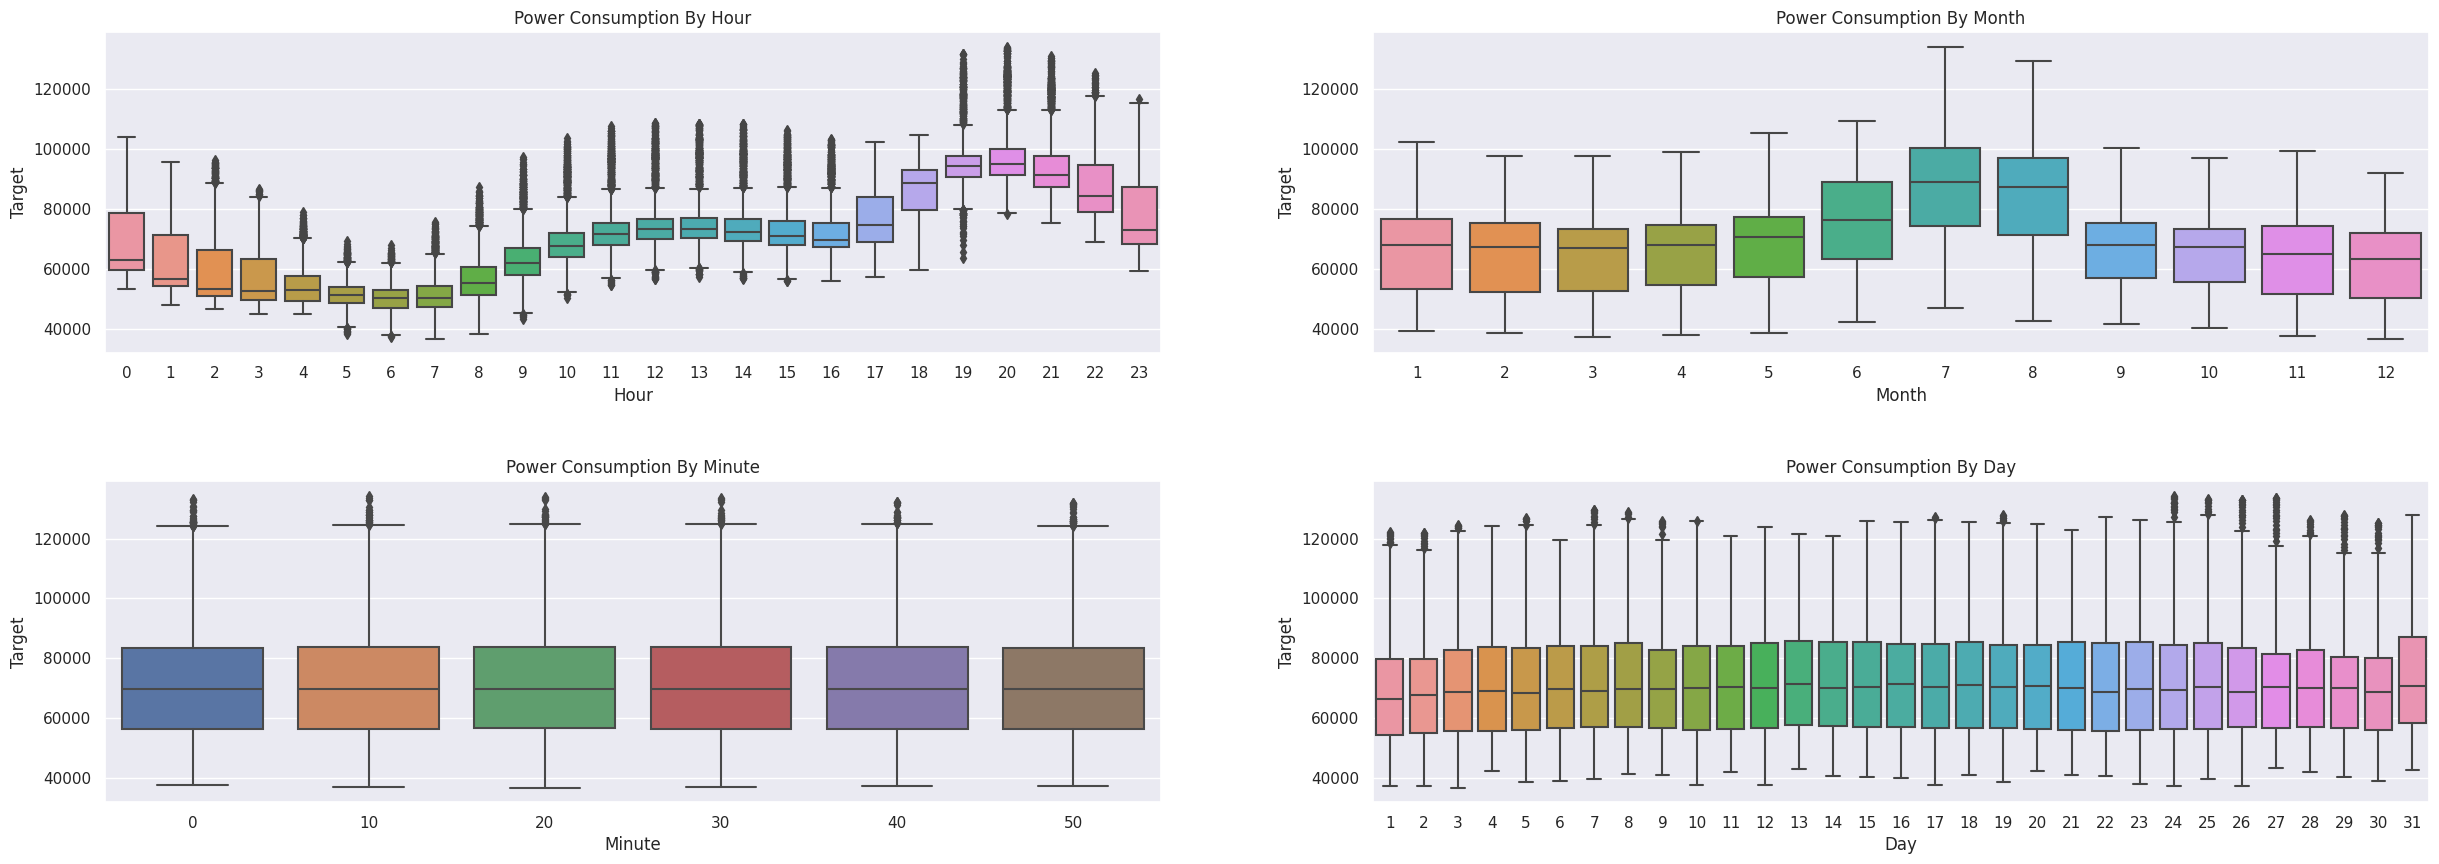

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(30, 10))

sns.boxplot(data=data, x='Hour', y='Target', ax=axes[0, 0])
axes[0, 0].set_title('Power Consumption By Hour')

sns.boxplot(data=data, x='Month', y='Target', ax=axes[0, 1])
axes[0, 1].set_title('Power Consumption By Month')

sns.boxplot(data=data, x='Minute', y='Target', ax=axes[1, 0])
axes[1, 0].set_title('Power Consumption By Minute')

sns.boxplot(data=data, x='Day', y='Target', ax=axes[1, 1])
axes[1, 1].set_title('Power Consumption By Day')

plt.subplots_adjust(hspace=0.4, wspace=0.2)

plt.show()


In [ ]:
data = data.drop(["Hour", "Minute", "Year", "Month", "Day"], axis = 1)
data.set_index("DateTime", inplace = True)
data

,Target
DateTime,
2017-01-01 00:00:00,70425.53544
2017-01-01 00:10:00,69320.84387
2017-01-01 00:20:00,67803.22193
2017-01-01 00:30:00,65489.23209
2017-01-01 00:40:00,63650.44627
...,...
2017-12-30 23:10:00,72798.08659
2017-12-30 23:20:00,70983.80786
2017-12-30 23:30:00,68675.04965


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52416 entries, 2017-01-01 00:00:00 to 2017-12-30 23:50:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Target  52416 non-null  float64
dtypes: float64(1)
memory usage: 819.0 KB


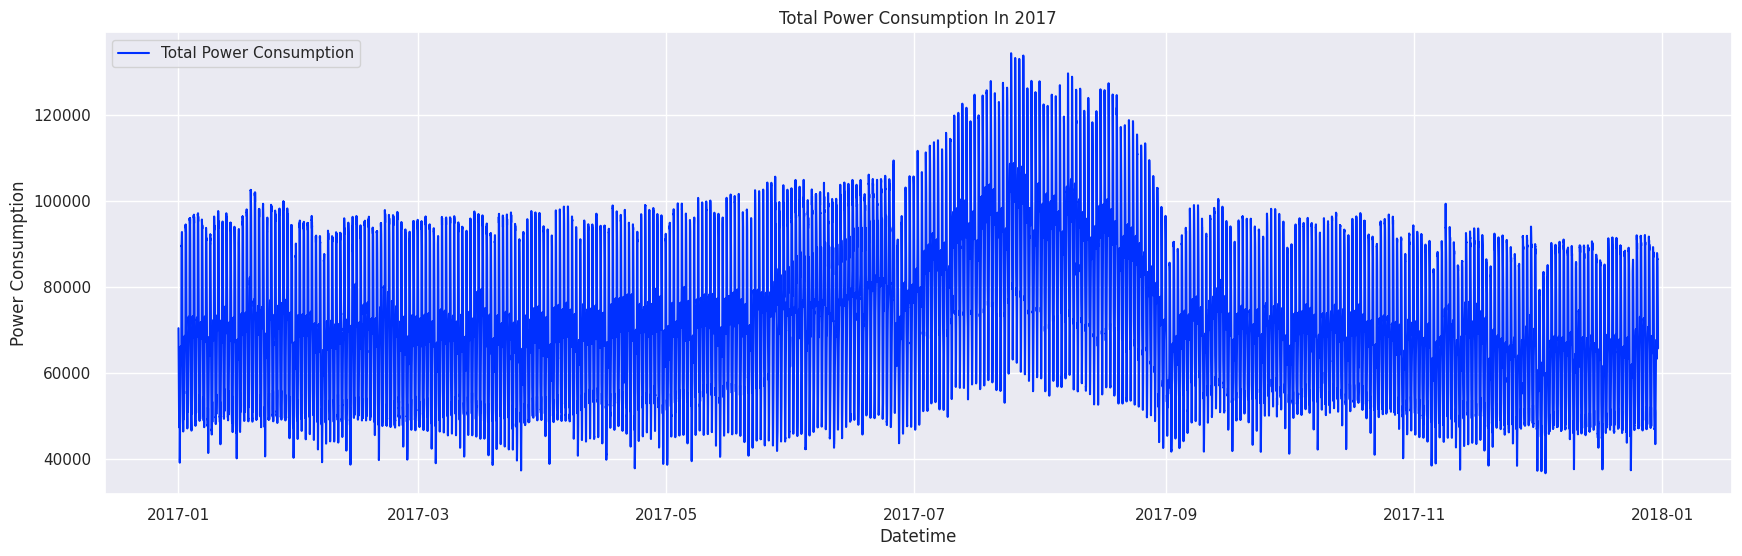

In [ ]:
fig, ax = plt.subplots(figsize=(21, 6))
ax.plot(data.index, data['Target'], color ='#0030FF', label='Total Power Consumption')

plt.title('Visualisation of Total Power Consumption')
ax.set_ylabel('Power Consumption')
ax.set_xlabel('Datetime')
ax.legend(loc = 'upper left')
plt.show()

Stationary Test (Dickery-Fuller) 

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(dftest[0:4], index=["Test Statistic", "p-value",
                                             "Lags Used", "Number of Observations Used"])
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)
    if dftest[1] <= 0.05:
        print('\nData is stationary, strong evidence against the null hypothesis (Ho).')
    else:
        print('\nData non-stationary, weak evidence against the null hypothesis (Ho).')

adf_test(data['Target'])

Results of Dickey-Fuller Test:
Test Statistic                   -26.567630
p-value                            0.000000
Lags Used                         58.000000
Number of Observations Used    52357.000000
Critical Value (1%)               -3.430475
Critical Value (5%)               -2.861595
Critical Value (10%)              -2.566799
dtype: float64

Data is stationary, strong evidence against the null hypothesis (Ho).


As the P-Value is less than 0.05, it provides rejects the null hypothesis and thus indicating that the data is stationary. Therefore, the data need not go through the differencing process, that is a process done to convert the non-stationary series into a stationary one.
